# Only in Colab!

(Or a machine with PyTorch installed & at least 12GB GPU Memory...)

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('drive/My Drive/IS53055B-DMLCP/models/StyleGan') # change for your directory

Mounted at /content/drive


In [ ]:
os.getcwd()

'/content/drive/My Drive/IS53055B-DMLCP/models/StyleGan'

---

# StyleGAN 3

[Github](https://github.com/NVlabs/stylegan3). This codebase is backward-compatible with StyleGAN 2 models, apparently!

In [ ]:
!git clone https://github.com/NVlabs/stylegan3

Cloning into 'stylegan3'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 212 (delta 0), reused 1 (delta 0), pack-reused 207
Receiving objects: 100% (212/212), 4.17 MiB | 13.27 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [ ]:
os.chdir("stylegan3")

In [ ]:
os.listdir()

['.git',
 '.github',
 'Dockerfile',
 'LICENSE.txt',
 'README.md',
 'avg_spectra.py',
 'calc_metrics.py',
 'dataset_tool.py',
 'dnnlib',
 'docs',
 'environment.yml',
 'gen_images.py',
 'gen_video.py',
 'gui_utils',
 'legacy.py',
 'metrics',
 'torch_utils',
 'train.py',
 'training',
 'visualizer.py',
 'viz']

In [ ]:
with open('environment.yml') as i:
    print(i.read())

name: stylegan3
channels:
  - pytorch
  - nvidia
dependencies:
  - python >= 3.8
  - pip
  - numpy>=1.20
  - click>=8.0
  - pillow=8.3.1
  - scipy=1.7.1
  - pytorch=1.9.1
  - cudatoolkit=11.1
  - requests=2.26.0
  - tqdm=4.62.2
  - ninja=1.10.2
  - matplotlib=3.4.2
  - imageio=2.9.0
  - pip:
    - imgui==1.3.0
    - glfw==2.2.0
    - pyopengl==3.1.5
    - imageio-ffmpeg==0.4.3
    - pyspng



In [ ]:
!pip install ninja # I ran the code once (cell below), saw in the error that ninja was required!

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 3.8 MB/s eta 0:00:0000:01


In [ ]:
# Generate an image using pre-trained AFHQv2 model ("Ours" in Figure 1, left).
!python gen_images.py \
	--outdir=out \
	--trunc=1 \
	--seeds=2 \
	--network=https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-afhqv2-512x512.pkl

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-afhqv2-512x512.pkl"...
Generating image for seed 2 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.


In [ ]:
os.listdir('out')

['seed0002.png']

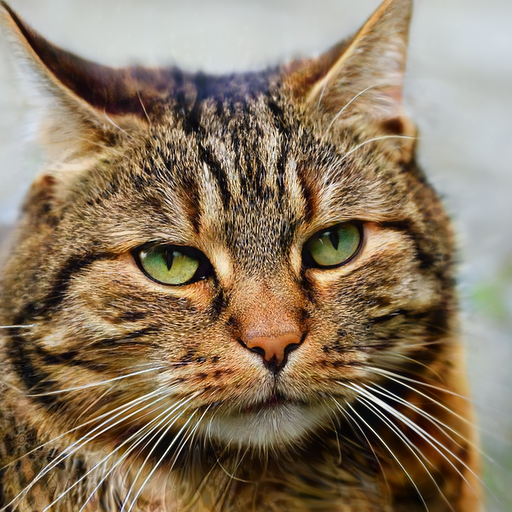

In [ ]:
from PIL import Image
im = Image.open('out/seed0002.png')
im

In [ ]:
# Render a 4x2 grid of interpolations for seeds 0 through 31.
!python gen_video.py \
    --output=out/lerp.mp4 \
    --trunc=1 \
    --seeds=0-31 \
    --grid=4x2 \
    --network=https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-afhqv2-512x512.pkl

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-afhqv2-512x512.pkl"...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
100% 480/480 [02:47<00:00,  2.87it/s]


In [ ]:
# https://stackoverflow.com/a/57378660
from IPython.display import HTML
from base64 import b64encode
with open('out/lerp.mp4','rb') as i:
    mp4 = i.read()

In [ ]:
data_url = f"data:video/mp4;base64,{b64encode(mp4).decode()}"
HTML("""
<video width=1200 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

---

[This repo](https://github.com/5agado/data-science-learning/tree/master/deep%20learning/StyleGAN) might be worth looking into, with the caveat that it might require some adaptation from StyleGAN 2 to 3 (issue is: StyleGAN 2 is no longer easily runnable on Colab, so far as I'm aware)...